# The Interaction between lakes and atmosphere on Titan
## For EAPS 591 - planetary atmospheres Spring 2021
## Riley McGlasson
- - -
### Variables:
 * Total lake surface area
 * composition of lakes
 * seasonal temperature fluctuations
 * evaporation rate
- - -
### Helpful excerpts:
 From Mitri et al. (2006): 
  * Titan has a massive nitrogen atmosphere with a pressure atsurface  level  of∼1.5  bars,  in  which  molecular  nitrogen  N2is  the  dominant  constituent  and  methane  CH4is  the  secondmost abundant component, having a mixing ratio of 4.9% near-surface  (Niemann  et  al.,  2005).
  * General circulation model (GCM) results (Tokano andNeubauer, 2002) suggest seasonal variation of air temperaturesnear the surface of less than 1 K at low latitudes and up to 4 Kat  the  poles  with  a  maximum  temperature  of∼94  K  during the southern summer solstice, and a minimum temperature of∼90 K during the polar winter (Tokano and Neubauer, 2002)
  * Huygens measured a surface pressure of 1.47 bars (Fulchignoni et al. 2005)
  * An air density of∼5kgm−3was inferred fromthe  measurement  of  pressure,  temperature  and  air  composi-tion  (Fulchignoni  et  al.,  2005).  
  * According  to  GCM  results,tides and thermal gradients generate winds with a typical velocity  0.3–1  m s−1near  the  surface  (Tokano  and  Neubauer,2002).
  * For a liquid hydrocarbon body the mole fraction of methane,ethane, and nitrogen are estimated inLunine (1993)as a func-tion of the mole fraction in the atmosphere for a surface pres-sure of 1.5 bars. The relative fraction of methane, ethane andnitrogen in the liquid is sensitive to the temperature. For a tem-perature of 92.5 K and for a CH4mole fraction of∼4.9×10−2in the atmosphere near the surface (see Fig. 2 inLunine, 1993),the  model  predicts  a  mole  fraction  of  CH4∼0.35,  of  C2H6∼0.60, of N2∼0.05 in a liquid hydrocarbon body.
  * Section 2.1.5.  Evaporation rate and surface temperature of a lake
  * Our model predicts that the evaporation of hydrocarbons onthe Titan surface is∼0.3×10^3 to 5×10^3kg m−2yr−1
  * Assuming a steady state where the average rate of evaporationand precipitation are equal, for a fractional area lake coverageof 0.004 and a lake elevation change of 10 m yr−1, we deter-mine that the global precipitation rate on the surface of Titanto be 0.04 m yr−1
  * * DOES THIS VARY AND CAN I FIND A SEASONAL VARIANCE or just recreate this
  * The seasonal variation of the air temperature can change thefractional lake coverage.
  
From Rafkin and Soto (2020):
 * As the lake (but not the at-mosphere) cools, the magnitude of the sensible heat flux increases in proportion to the difference in temperature between the air and lake. At the same time, the moistening atmosphere and cooling lake (and therefore the saturation vapor pressure over the lake) drives down the magnitude of latent heat flux. 
 * Table 1 has potentially useful values

From Tan et al. 2013:
 * Tan et al. (2013): Despite the small difference in temperature (3.7 K), uponapplying an additional assumption that the overall composi-tion is the same as that in the equator, the liquid in polarregion has a very different composition: 68% CH4,22% N2,and 8% C2H6

### Helpful equations:

Evaporation rate (Fiarall et al. 1996 via Mitri et al. 2007 eq. 6):
$$ E = \rho_{air}K(q^*-q)u_r $$
where $\rho_{air}$ is the air density, K is the transport coefficient evaluated at a reference height $z_r$, $q^*$ is the saturation specific humidity, $q$ is the specific humidity, and $u_r$ is the horizontal component of the averaged wind speed relative to the surface at height $z_r$.

K is from Mitri eq 13:
$$K=\left[\frac{\kappa a}{ln(z_r/z_0)}\right]^2$$
but all of those terms are calculated by other equations. They find K∼0.0016 for a wind speed of 0.1 m/s and K∼0.0013 for a wind speed of 1 m/s.





## Consider using E from Tokano 2013 
### Also in Tokano and Lorenz 2019 equation 2
$$E=C_D \rho_a W_S (k_s - k_a)/L$$
and if $k_s<k_a$, $E=0$

- - -

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Temperature throughout the year
General circulation model (GCM) results (Tokano andNeubauer, 2002) suggest seasonal variation of air temperaturesnear the surface of less than 1 K at low latitudes and up to 4 Kat the poles with a maximum temperature of∼94 K during the southern summer solstice, and a minimum temperature of∼90 K during the polar winter

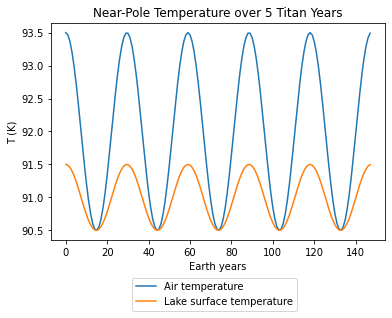

In [3]:
T_min = 90.5 #K
T_max = 93.5 #K
# 1 Titan day is 16 Earth days (16 days to orbit Saturn)
# 1 year is ~29 Earth year
# 
yrs = 5 #how many year to run model
t = np.arange(0,29.5*yrs,1)
T = (T_min+T_max)/2 + 1.5*np.cos(2*np.pi*t/29.5)
T_s = 91 + .5*np.cos(2*np.pi*t/29.5)

plt.plot(t, T)
plt.plot(t,T_s)
plt.xlabel('Earth years')
plt.ylabel('T (K)')
plt.title('Near-Pole Temperature over '+str(yrs)+' Titan Years')
plt.legend(['Air temperature','Lake surface temperature'],bbox_to_anchor=(.75, -.15))

plt.savefig('/Users/Riley/Desktop/atmospheres/titan/titantemps_'+str(yrs)+'yrs.png',bbox_inches='tight')
plt.show()

### Evaporation Rate Calculations from Tokano (2013)
$$E=C_k \rho_a V (k_s - k_a)/L$$

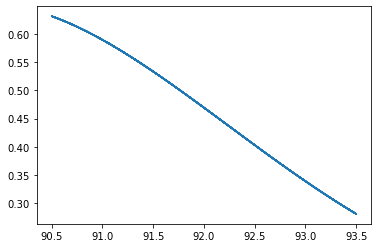

In [14]:
#evaporation rate variables
R_Titan = 2.57E+6 #m
SA_Titan = 4*np.pi*R_Titan**2 #m^2 surface area of Titan
#SA_lakes_min = .002*SA_Titan # from Mitri et al. 2007
SA_lakes_max = .015*SA_Titan # from Lopes et al. 2020

p_star_CH4 = 0.001111135*(T_s**2) - 0.1875504*T_s + 7.988267 # bars methane saturation vapor pressure (function of T)
molfrac_liq_CH4 = -51066.35 + 2161.026*T - 34.2679*T**2 + 0.2413333*T**3 - 0.0006369048*T**4 # function fit to data from Tan et al. 2013 Fig 19
#molfrac_liq_CH4_c35 = .35
molfrac_liq_CH4_c60 = .6


C_k = 0.001 # transfer coefficient of enthalpy
rho_air = 5 #kg/m^3
V = 1 #m/s near-surface wind speed
#V = .1 #m/s near-surface wind speed
L = 5.45E+05 #J/kg vaporization enthalpy of methane
c_pd = 1074 #J/Kkg specific heat capacity at constantpressure of dry air (nitrogen)
c_pv = 1203 #J/Kkg specific heat capacity of methane vapor
T_a = T #near surface air temp

molfrac_air_CH4 = .05 #methane mole fraction of the air
p = 1.5 # bars atmospheric pressure

q = .573*molfrac_air_CH4 #specific humidity with respect to methane


###tests
# q_s_var = .573 * 1.135*molfrac_liq_CH4*p_star_CH4/p
# q_s_c60 = .573 * 1.135*molfrac_liq_CH4_c60*p_star_CH4/p
# k_s_var = (c_pd*(1-q_s_var) + c_pv*q_s_var)*T_s + (L*q_s_var)
# k_s_c60 = (c_pd*(1-q_s_c60) + c_pv*q_s_c60)*T_s + (L*q_s_c60)
# k_a = (c_pd*(1-q) + c_pv*q)*T+(L*q)

# plt.plot(T, k_s_var)
# plt.plot(T, k_s_c60)
# plt.plot(T,k_a)
plt.plot(T,molfrac_liq_CH4)

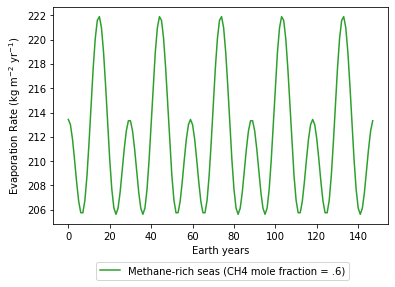

total evaporation over 1 Titan year (var): 3.796e+15 kg
total evaporation over 1 Titan year (20%): 0.000e+00 kg
total evaporation over 1 Titan year (60%): 7.754e+15 kg


In [16]:
# calculate E, when k_s<k_a E = 0
E_var = []
E_c20 = []
E_c60 = []
k_a_s_c60 = []
for i in range(len(T)):
    p_star_CH4 = 0.001111135*(T_s[i]**2) - 0.1875504*T_s[i] + 7.988267 # bars methane saturation vapor pressure (function of T)
    molfrac_liq_CH4_var = -51066.35 + 2161.026*T[i] - 34.2679*T[i]**2 + 0.2413333*T[i]**3 - 0.0006369048*T[i]**4 # function fit to data from Tan et al. 2013 Fig 19
    molfrac_liq_CH4_c20 = .2
    molfrac_liq_CH4_c60 = .6
        
    q_s_var = .573 * 1.135*molfrac_liq_CH4_var*p_star_CH4/p
    q_s_c20 = .573 * 1.135*molfrac_liq_CH4_c20*p_star_CH4/p
    q_s_c60 = .573 * 1.135*molfrac_liq_CH4_c60*p_star_CH4/p

    k_a = (c_pd*(1-q) + c_pv*q)*T[i]+(L*q)
    k_s_var = (c_pd*(1-q_s_var) + c_pv*q_s_var)*T_s[i] + (L*q_s_var)
    
    if k_s_var <k_a:
        E_var_i=0
    else:
        E_var_i = C_k*rho_air*V*(k_s_var-k_a)/L
        E_var_i = E_var_i*60*525600 #kg m^-2 yr^-1
    E_var.append(E_var_i)
        
    k_s_c20 = (c_pd*(1-q_s_c20) + c_pv*q_s_c20)*T_s[i] + (L*q_s_c20)
    if k_s_c20 <k_a:
        E_c20_i=0
    else:
        E_c20_i = C_k*rho_air*V*(k_s_c20-k_a)/L
        E_c20_i = E_c20_i*60*525600 #kg m^-2 yr^-1
    E_c20.append(E_c20_i)
        
    k_s_c60 = (c_pd*(1-q_s_c60) + c_pv*q_s_c60)*T_s[i] + (L*q_s_c60)
    if k_s_c60 <k_a:
        E_c60_i=0
    else:
        E_c60_i = C_k*rho_air*V*(k_s_c60-k_a)/L
        E_c60_i = E_c60_i*60*525600 #kg m^-2 yr^-1
    E_c60.append(E_c60_i)
    #k_a_s_c60.append(k_s_c60-k_a)

    
#plt.plot(t,E_var, color = "C0")
#plt.plot(t,E_c20, color = "C1" )
plt.plot(t,E_c60, color = "C2")
#plt.plot(T,k_a_s_c60)
plt.xlabel('Earth years')
plt.ylabel('Evaporation Rate (kg m$^{-2}$ yr$^{-1}$)')
#plt.title('Near-Pole Evaporation Rate over '+str(yrs)+' Titan years')
#plt.legend(['T-dependent CH4 mole fraction','Ethane-rich seas (CH4 mole fraction = .2)', 'Methane-rich seas (CH4 mole fraction = .6)'],bbox_to_anchor=(.9, -.15))
#plt.legend(['T-dependent CH4 mole fraction'],bbox_to_anchor=(.8, -.15))
#plt.legend(['Ethane-rich seas (CH4 mole fraction = .2)'],bbox_to_anchor=(.9, -.15))
plt.legend(['Methane-rich seas (CH4 mole fraction = .6)'],bbox_to_anchor=(.9, -.15))

#plt.savefig('/Users/Riley/Desktop/atmospheres/titan/titanevap_c60_'+str(yrs)+'yrs.png',bbox_inches='tight')
plt.show()

#print('lower bound total evaporation over 1 Titan year (var):',format(np.trapz(E_var,t)*SA_lakes_min/yrs,".3e"),'kg')
print('total evaporation over 1 Titan year (var):',format(np.trapz(E_var,t)*SA_lakes_max/yrs,".3e"),'kg')
#print('lower bound total evaporation over 1 Titan year (20%):',format(np.trapz(E_c20,t)*SA_lakes_min/yrs,".3e"),'kg')
print('total evaporation over 1 Titan year (20%):',format(np.trapz(E_c20,t)*SA_lakes_max/yrs,".3e"),'kg')
#print('lower bound total evaporation over 1 Titan year (60%):',format(np.trapz(E_c60,t)*SA_lakes_min/yrs,".3e"),'kg')
print('total evaporation over 1 Titan year (60%):',format(np.trapz(E_c60,t)*SA_lakes_max/yrs,".3e"),'kg')

From Tokano 2009: For methane-rich seas:"Occasional, small sea evaporation can occur in any season, butthe largest amount of evaporation occurs in winter. There aretwo reasons for this. First, the atmospheric methane mixing ratiobecomes smallest in this season by virtue of seasonal methanetransport (Fig. 3b), so the low methane partial pressure enablesmethane evaporation. Secondly, the air temperature is very low,so the near-surface air is destabilized in terms of static stability.This is the case although the air above the planetary boundarylayer at the winter pole is not only stably stratified but also con-tains an inversion layer (Tokano, 2005). Evaporation is more diffi-cult in summer because the air is much warmer than the cool seasurface, so the near-surface is well stratified, and the methaneabundance is high, i.e. the atmospheric methane partial pressureexceeds the methane vapour pressure over the sea."

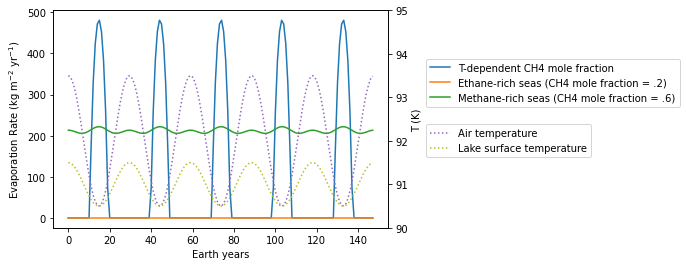

In [102]:
fig, ax1 = plt.subplots()

#color = 'tab:red'
ax1.set_xlabel('Earth years')
ax1.set_ylabel('Evaporation Rate (kg m$^{-2}$ yr$^{-1}$)')
ax1.plot(t,E_var, color = "C0")
ax1.plot(t,E_c20, color = "C1" )
ax1.plot(t,E_c60, color = "C2")

plt.legend(['T-dependent CH4 mole fraction','Ethane-rich seas (CH4 mole fraction = .2)', 'Methane-rich seas (CH4 mole fraction = .6)'],bbox_to_anchor=(1.1, .8))
#plt.legend(['Ethane-rich seas (CH4 mole fraction = .2)'],bbox_to_anchor=(.9, -.15))
#plt.legend(['Methane-rich seas (CH4 mole fraction = .6)'],bbox_to_anchor=(.9, -.15))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
ax2.set_ylabel('T (K)')  # we already handled the x-label with ax1
ax2.plot(t, T, color= "C4", ls = ':')
ax2.plot(t, T_s, color= "C8", ls = ':')
ax2.set_ylim([90,95])
#ax2.tick_params(axis='y', labelcolor=color)

plt.legend(['Air temperature','Lake surface temperature'],bbox_to_anchor=(1.1, .5))
#plt.legend(['Air temperature','Lake surface temperature'],bbox_to_anchor=(.7, -.25))

plt.savefig('/Users/Riley/Desktop/atmospheres/titan/titanevaptemp_all_'+str(yrs)+'yrs.png',bbox_inches='tight')
plt.show()
